In [625]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

data_frame = pd.read_csv("train.csv", sep = ",")
test_frame = pd.read_csv("test.csv", sep = ",")
data_frame.set_index('Id', inplace = True)
test_frame.set_index('Id', inplace = True)
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(8), object(3)
memory usage: 1.5+ MB


In [626]:
test_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 18 columns):
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(8), object(3)
memory usage: 742.2+ KB


In [627]:
#Подготовка данных
#смотрим уникальные значения по признакам
data_frame["Ecology_2"].unique()

array(['B', 'A'], dtype=object)

In [628]:
data_frame["Ecology_3"].unique()

array(['B', 'A'], dtype=object)

In [629]:
data_frame["Shops_2"].unique()

array(['B', 'A'], dtype=object)

In [630]:
#у трех признаков одинаковые значения - можем заменить их на dummies 
mapping = {'A': 0, 'B': 1}
data_frame = data_frame.replace({'Ecology_2': mapping, 'Ecology_3': mapping, 'Shops_2': mapping})
test_frame = test_frame.replace({'Ecology_2': mapping, 'Ecology_3': mapping, 'Shops_2': mapping})

In [631]:
data_frame.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,NaN,0,11,1,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,229.0,1,3,1,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.0,2,4,1,150226.531644


In [632]:
test_frame.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,1,1,11,2748,1,NaN,0,0,1
15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,1,1,6,1437,3,NaN,0,2,1
5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1
15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1,1,23,4583,3,NaN,3,3,1
14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,1,1,2,629,1,NaN,0,0,0


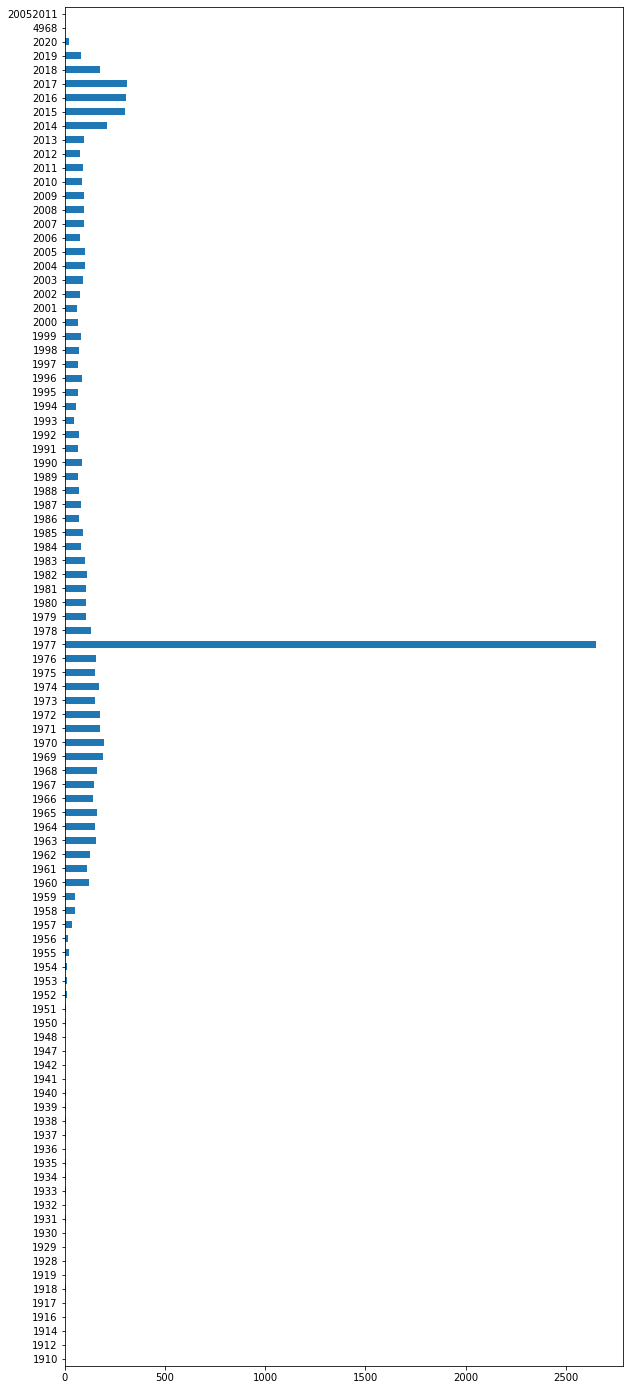

In [633]:
# посмотрим годы постройки домов
from pylab import rcParams 
rcParams["figure.figsize"] = 10, 25 
houses_years = data_frame['HouseYear'].value_counts()
houses_years = houses_years.sort_index()
houses_years.plot(kind = 'barh')

#на диаграмме можем наблюдать не верные значения годов постройки

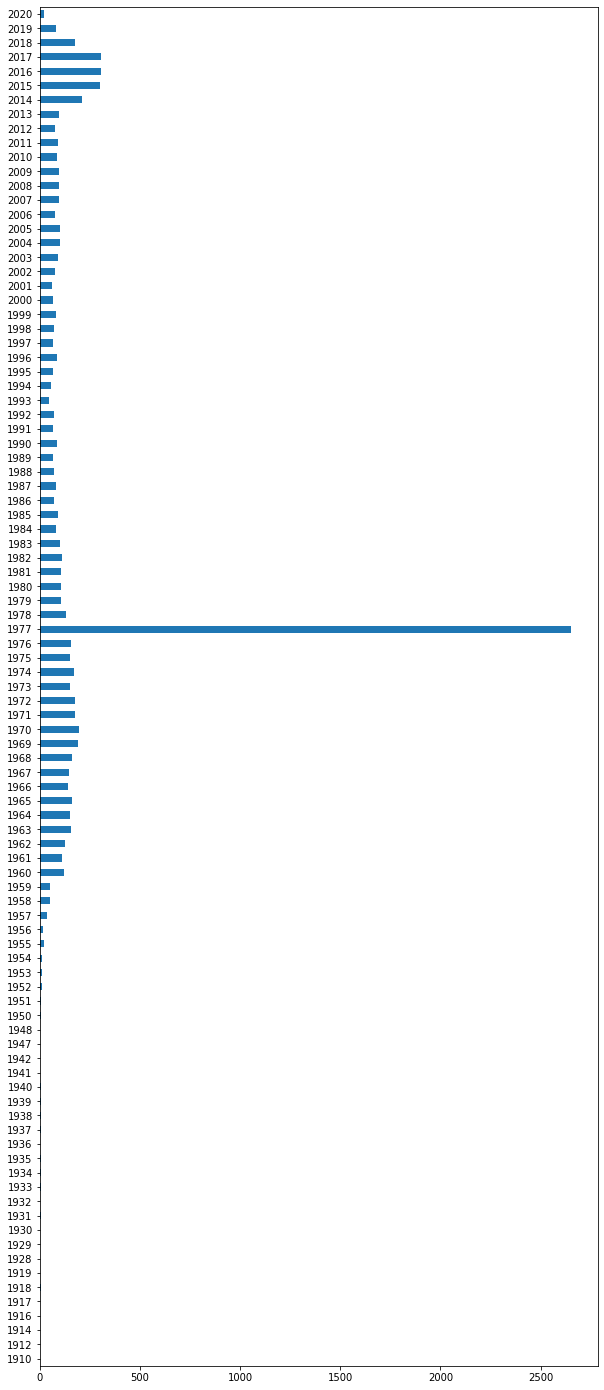

In [634]:
#исправим значения годов постройки домов
mapping = {20052011: 2011, 4968: 1968}
data_frame = data_frame.replace({'HouseYear': mapping})
houses_years = data_frame['HouseYear'].value_counts()
houses_years = houses_years.sort_index()
houses_years.plot(kind = 'barh')

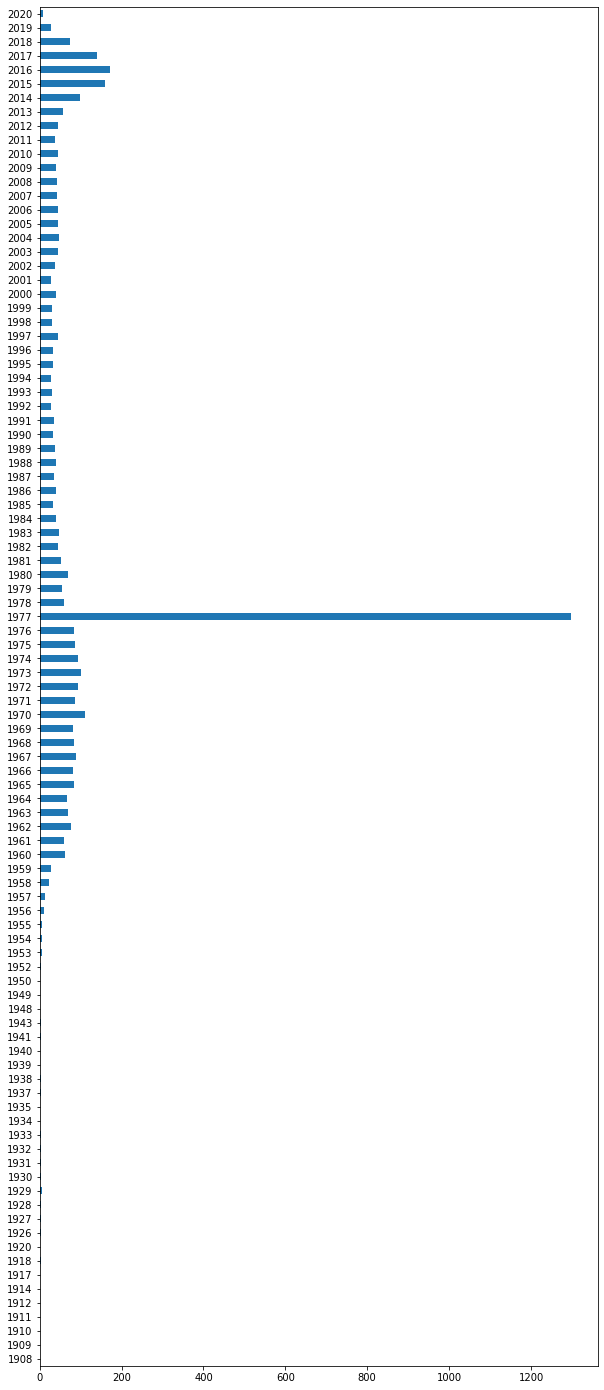

In [635]:
# посмотрим годы постройки домов в тестовом наборе
rcParams["figure.figsize"] = 10, 25 
houses_years = test_frame['HouseYear'].value_counts()
houses_years = houses_years.sort_index()
houses_years.plot(kind = 'barh')
# ошибочных значений нет

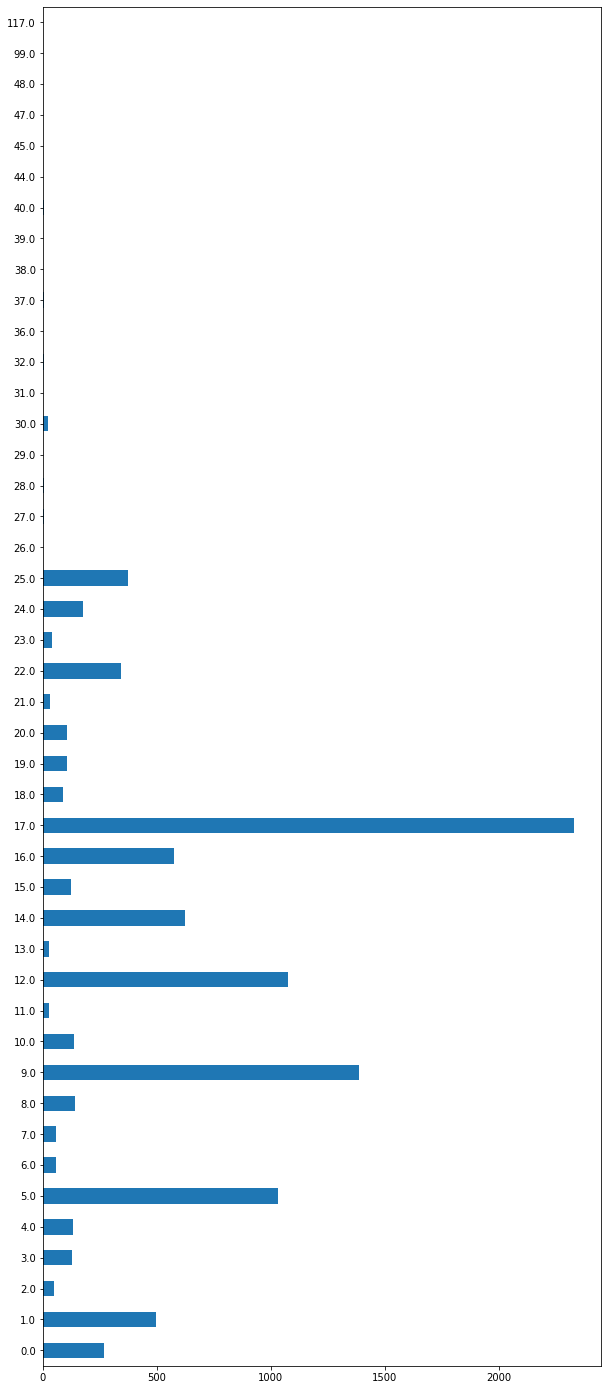

In [636]:
#посмотрим значения этажности зданий
houses_flor = data_frame['HouseFloor'].value_counts()
houses_flor = houses_flor.sort_index()
houses_flor.plot(kind = 'barh')
#на диаграмме видно, что крайнее значение этажности = 117 этажам и 0 этажам
#заменим эти выбросы на медиану

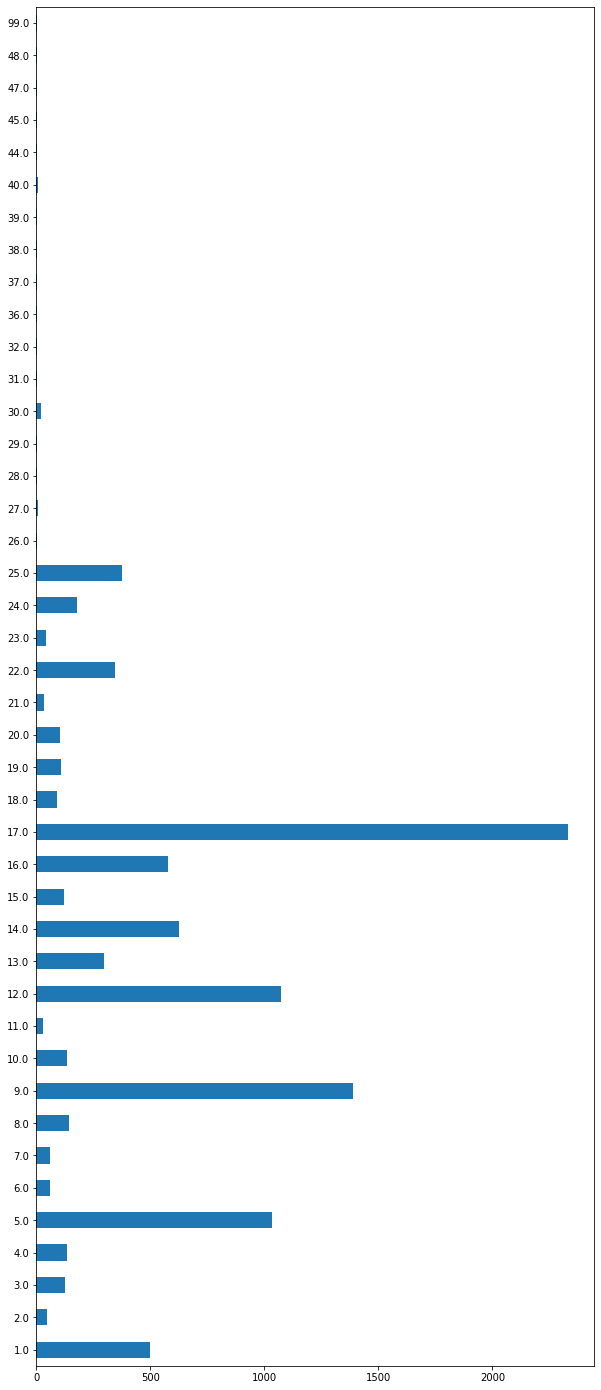

In [637]:
median_floor = data_frame['HouseFloor'].median()
data_frame.loc[(data_frame['HouseFloor'] == 0) | (data_frame['HouseFloor'] == 117), 'HouseFloor'] = median_floor
houses_flor = data_frame['HouseFloor'].value_counts()
houses_flor = houses_flor.sort_index()
houses_flor.plot(kind = 'barh')

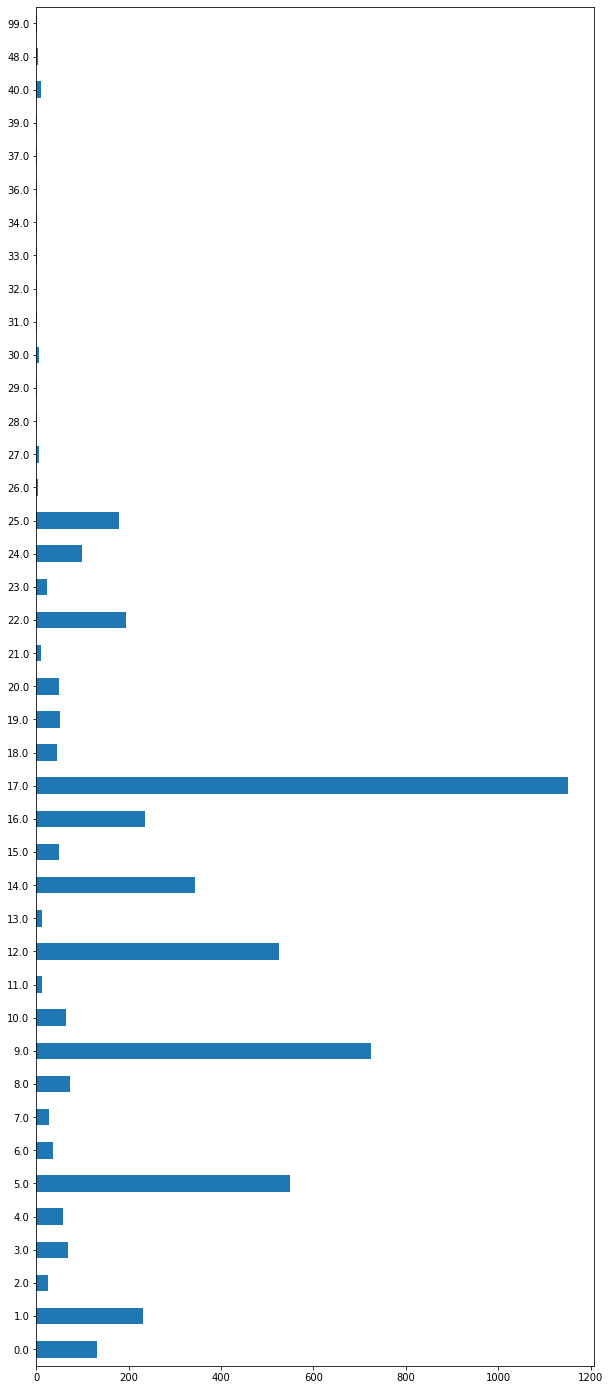

In [638]:
#посмотрим значения этажности зданий для тестовой выборки
rcParams["figure.figsize"] = 10, 25 
houses_flor = test_frame['HouseFloor'].value_counts()
houses_flor = houses_flor.sort_index()
houses_flor.plot(kind = 'barh')
#заменим 0 этажность на медиану

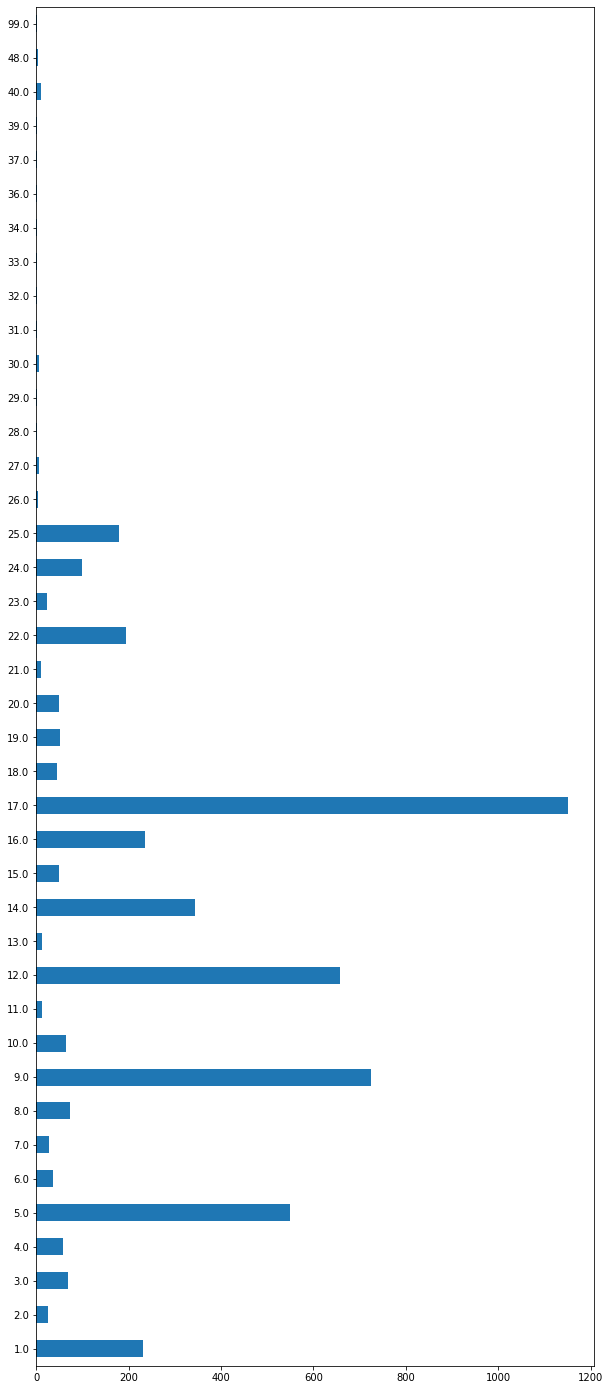

In [639]:
median_floor = test_frame['HouseFloor'].median()
test_frame.loc[(test_frame['HouseFloor'] == 0) | (test_frame['HouseFloor'] == 117), 'HouseFloor'] = median_floor
houses_flor = test_frame['HouseFloor'].value_counts()
houses_flor = houses_flor.sort_index()
houses_flor.plot(kind = 'barh')

In [640]:
#этаж - нет ошибок
data_frame['Floor'].unique()

array([ 7,  8, 11,  5,  3, 14,  9, 13,  1,  6,  4, 16, 12, 15, 19,  2, 17,
       20, 10, 18, 26, 23, 22, 24, 21, 25, 32, 28, 27, 42, 31, 37, 33])

In [641]:
#проверим есть ли пропущенные значения призанака kitchen_square
data_frame['KitchenSquare'].isnull().values.any()
#пропущенных значений нет

False

In [642]:
#проверим есть ли пропущенные значения признака square
data_frame['Square'].isnull().values.any()
#пропущенных значений нет

False

In [643]:
#проверим есть ли пропущенные значения признака life_square
data_frame['LifeSquare'].isnull().values.any()
#пропущенные значения есть

True

In [644]:
#вычислим наиболее часто встречающуюся долю процента жилой площади от общей
#что бы на основании этого заполнить пропуски
df = data_frame['LifeSquare'] * 100 / data_frame['Square']
tf = test_frame['LifeSquare'] * 100 / test_frame['Square']
from scipy import stats
result = stats.mode(df.values)
test_result = stats.mode(tf.values)
value = np.take(result, 0)
test_value = np.take(result, 0)
df_copy = data_frame.copy()
tf_copy = test_frame.copy()
df_copy['LifeSquare'] = df_copy['Square'] * value
tf_copy['LifeSquare'] = tf_copy['Square'] * test_value
data_frame['LifeSquare'] = data_frame['LifeSquare'].fillna(value = df_copy['LifeSquare'])
test_frame['LifeSquare'] = test_frame['LifeSquare'].fillna(value = tf_copy['LifeSquare'])
data_frame['LifeSquare'].isnull().values.any()

False

In [645]:
test_frame['LifeSquare'].isnull().values.any()

False

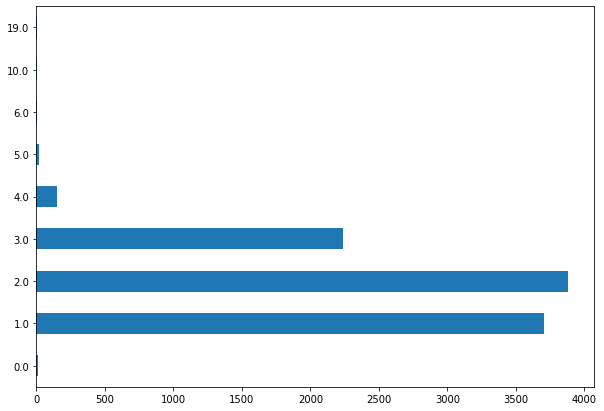

In [646]:
#посмотрим диаграмму комнат
rcParams["figure.figsize"] = 10, 7 
rooms = data_frame['Rooms'].value_counts()
rooms = rooms.sort_index()
rooms.plot(kind = 'barh')
#значения комнат 10 и 19 выглядят совсем из ряда вон - но учитывая их кол-во
#выглядит допустимо

In [647]:
#HealthCare_1 содержит много пропущенных значений
data_frame.isnull().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare          0
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [648]:
data_frame.loc[data_frame['Healthcare_1'].isnull(), 'Healthcare_1'] = data_frame['Healthcare_1'].median()
test_frame.loc[test_frame['Healthcare_1'].isnull(), 'Healthcare_1'] = test_frame['Healthcare_1'].median()
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null int64
Ecology_3        10000 non-null int64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     10000 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null int64
Price            10000 non-null float64
dtypes: float64(8), int64(11)
memory usage: 1.5 MB


In [649]:
test_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 18 columns):
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null int64
Ecology_3        5000 non-null int64
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     5000 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null int64
dtypes: float64(7), int64(11)
memory usage: 742.2 KB


Делим датасет на train и validation выборки

In [650]:
data_frame.columns.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price']

In [651]:
# признаки для обучения модели подбирались по наилучшему valid R2 после удаления малозначащих
# согласно результату feautere_importances в конце notebook
feature_names = ['DistrictId','Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1','Social_1', 'Social_2', 'Social_3',
                 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2']

target_name = 'Price'
X = data_frame[feature_names]
y = data_frame[target_name]

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=21)
X_train.shape

(7000, 16)

Обучение и оценка модели


In [652]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV
import seaborn as sns

rf_model = RandomForestRegressor(random_state=21)
rf_model.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=21, verbose=0, warm_start=False)

In [653]:
def evaluate_preds(train_true_values, train_pred_values, val_true_values, val_pred_values):
    """
    Функция для оценки работы модели
    Parameters:
    train_true_values - целевая переменная из тренировочной части датасета
    train_pred_values - предсказания модели по тренировочной части
    val_true_values - целевая переменная из валидационной части датасета
    val_pred_values - предсказания модели по валидационной части
    Returns:
    R2 на тренировочной и валидационной части, 
    графики зависимости истинных значений от предсказаний
    """
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Valid R2:\t" + str(round(r2(val_true_values, val_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=val_pred_values, y=val_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')
    plt.show()
    


Train R2:	0.963
Valid R2:	0.72


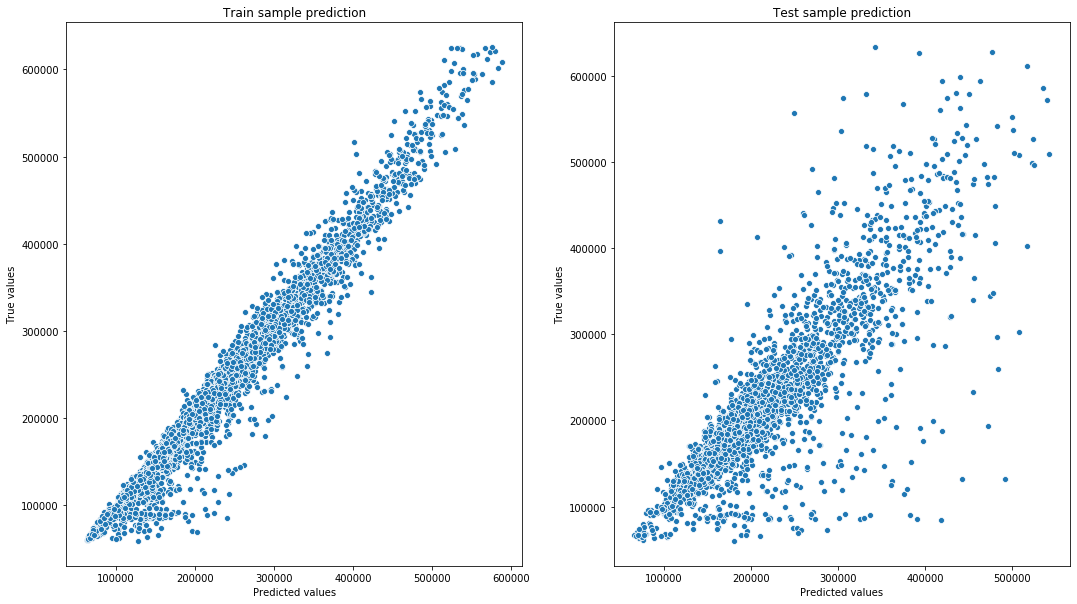

In [654]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_val)

evaluate_preds(y_train, y_train_preds, y_val, y_test_preds)

In [655]:
test_frame['Price'] = rf_model.predict(test_frame[feature_names])
test_frame.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,1,1,11,2748,1,900.0,0,0,1,165513.220738
15856,74,2.0,69.263183,41.562371,1.0,6,1.0,1977,0.075779,1,1,6,1437,3,900.0,0,2,1,206713.968970
5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1,221139.017588
15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1,1,23,4583,3,900.0,3,3,1,362580.970028
14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,1,1,2,629,1,900.0,0,0,0,146845.735516


In [656]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
2,Square,0.396993
9,Social_1,0.105120
10,Social_2,0.082237
1,Rooms,0.077873
11,Social_3,0.052735
0,DistrictId,0.045728
8,Ecology_1,0.040691
7,HouseYear,0.035383
3,LifeSquare,0.033406
5,Floor,0.028983


In [657]:
test_frame.loc[:, ['Id', 'Price']].to_csv('test_pred.csv', index=False)